## Assingmnet No.: 2
### Name: Parkale Shreya Jagdish 
### Roll No.:2447060 
### Batch: C 
### Problem Statement – 
Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. 
Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion 
matrix. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

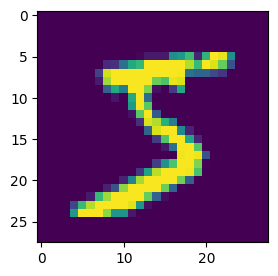

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])

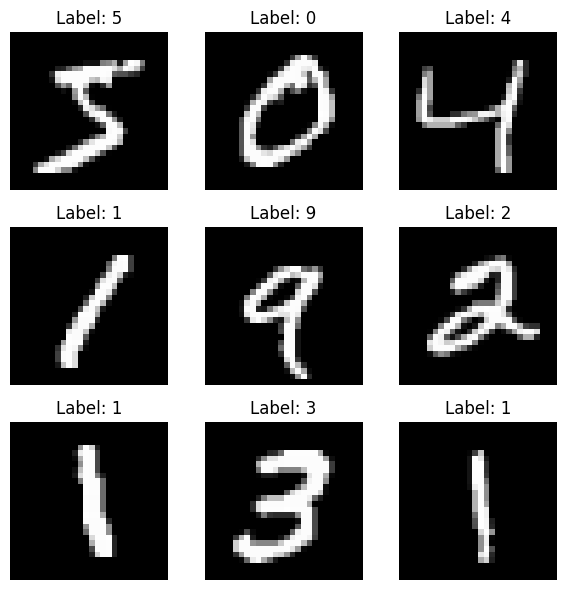

In [8]:
# Display first 9 images from the training set
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
# Reshape data to add channel dimension and normalizing between 0 and 1
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [10]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [11]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])


D:\Users\shrey\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8007 - loss: 0.6445 - val_accuracy: 0.9825 - val_loss: 0.0632
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9688 - loss: 0.1057 - val_accuracy: 0.9865 - val_loss: 0.0488
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9776 - loss: 0.0757 - val_accuracy: 0.9873 - val_loss: 0.0443
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9814 - loss: 0.0606 - val_accuracy: 0.9882 - val_loss: 0.0365
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9850 - loss: 0.0508 - val_accuracy: 0.9902 - val_loss: 0.0304


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 98.99%


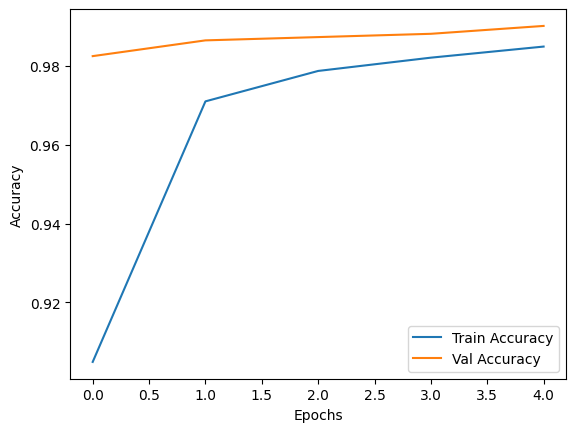

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Print classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
cm = confusion_matrix(y_test, y_pred_classes)

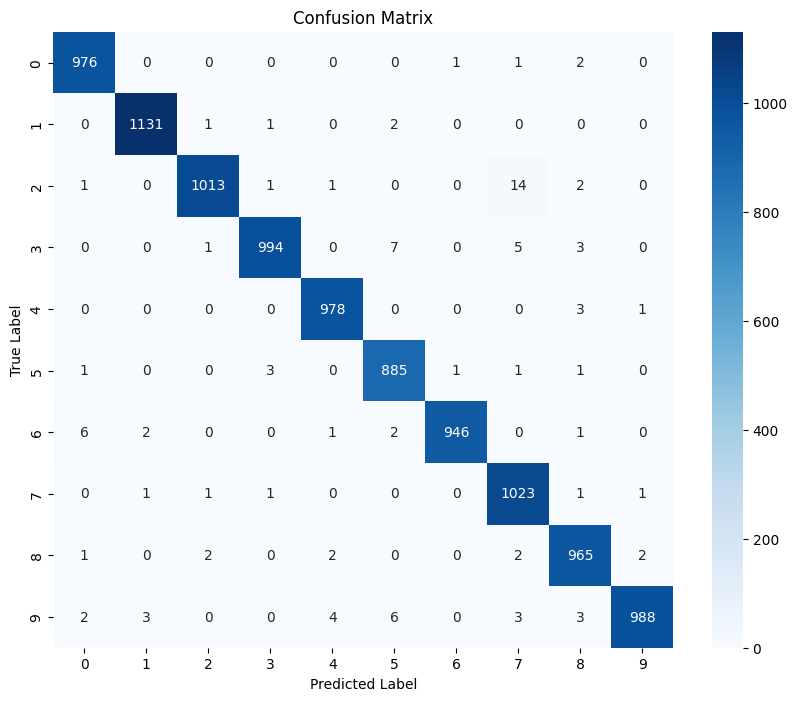

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()